# Random Forest Classifier 
-Grid search to find best parameters <br>
-Cross validation <br>
-Parameter-CV accuary plotting

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import warnings
import src.Utils as utils
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

# environment settings
data_path = 'Data/'

#hack to avoid showing deprecationg warnings
warnings.filterwarnings('ignore')

# Deserialize previously saved data from "preprocessing"
filehandler = open(data_path+'train_pp.obj', 'rb')
train_df = pickle.load(filehandler)
filehandler = open(data_path+'test_pp.obj','rb')
test_df = pickle.load(filehandler)
filehandler.close()

In [17]:
#Separate training set from target variables
X,y = utils.train_test_separator(train_df)
#Create training set and test set with split 0.2
X_train , X_test ,y_train,y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=1, 
                                                    stratify=y)
#Clean test_set
test_set = test_df
test_set=test_set.drop(['Name'], axis=1)

In [18]:
# Grid search to find best parameter values

# param_grid = {'n_estimators':[20,50,100,150],'max_features':[5,6,7],'max_depth':[5,7,9]}
# grid_rf = GridSearchCV(ske.RandomForestClassifier(n_jobs=-1),param_grid=param_grid,cv=10,scoring='accuracy')
# grid_rf.fit(X_train,y_train)
# print(grid_rf.best_score_)
# print(grid_rf.best_params_)

In [19]:
import sklearn.ensemble as ske
#Kfold cross-validation with 10 folds
kfold = StratifiedKFold(n_splits=10,random_state=1).split(X_train,y_train)

#Initialization of Random Forest Classifier
rf = ske.RandomForestClassifier(n_estimators=100,
                                max_features=6,
                                criterion='gini',
                                max_depth=9,
                                bootstrap=True).fit(X_train, y_train)

#Cross-validation score saved in scores array
scores= []
for k,(train,test) in enumerate(kfold):
    rf.fit(X_train[train], y_train[train])
    rf_train_score = rf.score(X_train[test],y_train[test])
    scores.append(rf_train_score)
print("\nCV accuracy : {} +/- {}".format(np.mean(scores),np.std(scores)))
rf.fit(X_train,y_train)
rf_test_score=rf.score(X_test,y_test)
print("Random Forest test accuracies {}".format(rf_test_score))


CV accuracy : 0.8252373397799099 +/- 0.04252082736434018
Random Forest test accuracies 0.7985074626865671


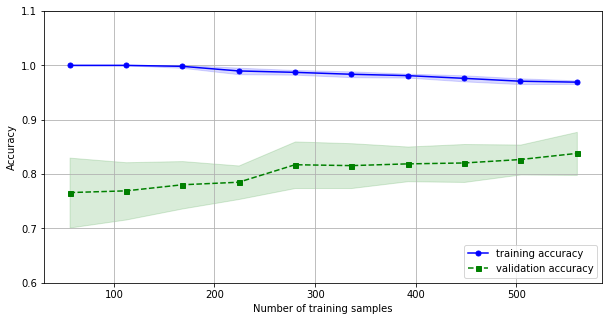

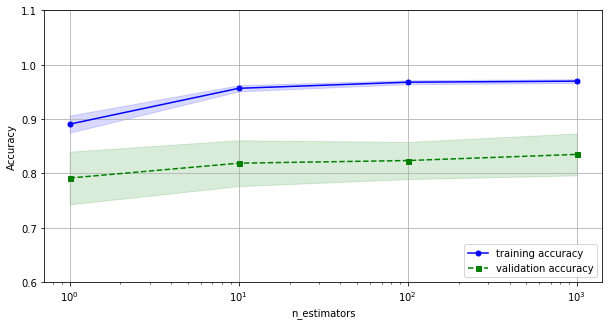

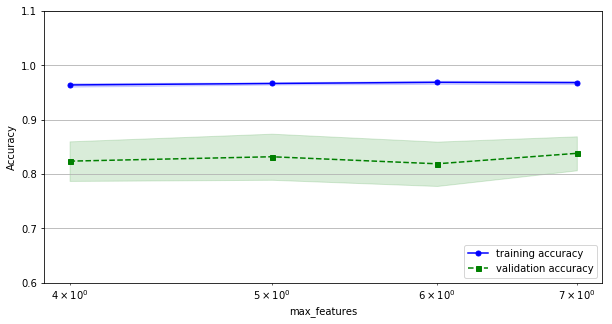

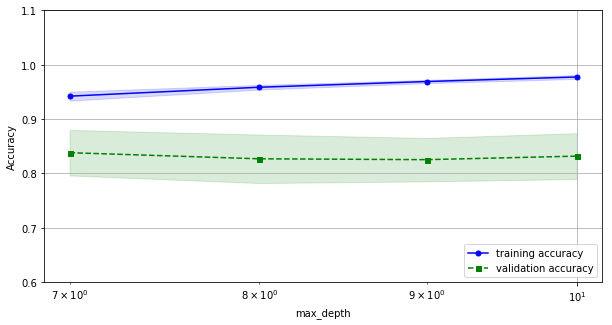

In [20]:
#Plotting graphs
utils.plot_cv_accuracy(classifier=rf,
                       X_train=X_train,
                       y_train=y_train)
utils.plot_cv_parameters(classifier=rf,
                        X_train=X_train,
                        y_train=y_train,
                        param='n_estimators',
                        param_range=[1,10,100,1000])
utils.plot_cv_parameters(classifier=rf,
                         X_train=X_train,
                         y_train=y_train,
                         param='max_features',
                         param_range=[4,5,6,7])
utils.plot_cv_parameters(classifier=rf,
                         X_train=X_train,
                         y_train=y_train,
                         param='max_depth',
                         param_range=[7,8,9,10])

#The graphs show grafically what the grid search found.

In [21]:
#Prediction on real test set using random forest
survival_results =rf.predict(test_set)
result_df = pd.DataFrame(data={'PassengerId':test_df['PassengerId'].values,
                               'Survived':survival_results})
result_df['Survived'] = [0 if x == False else 1 for x in result_df['Survived'] ]
#Create output csv file
result_df.to_csv(data_path+"outputs/randomforest_ne_100_maxd_9_maxf_6.csv",index=False)

In [22]:
#TODO :automatic file naming with param values , serialize output for ensamble learning